# Iris Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import seaborn as sns

import frame_learn as fl
from sklearn import linear_model
from sklearn import decomposition
from sklearn import preprocessing

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
iris, iris_te = model_selection.train_test_split(iris, stratify=iris['class'])

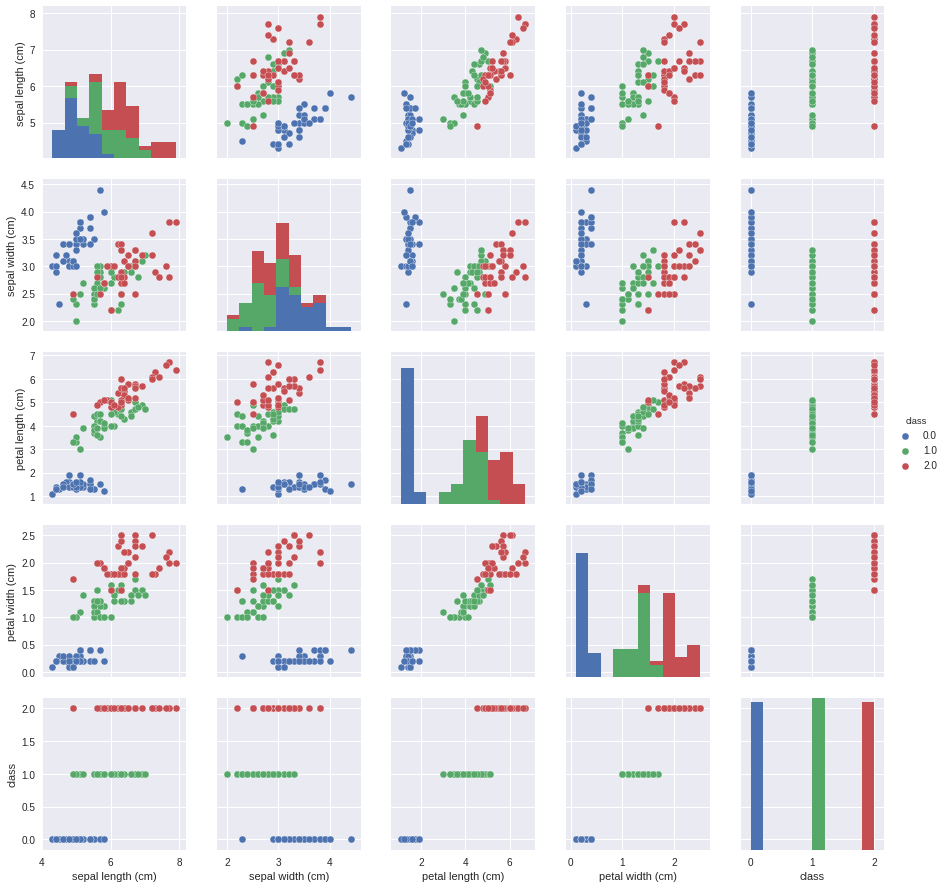

In [4]:
sns.pairplot(iris, 'class');

In [5]:
sns.barplot(
    data=pd.DataFrame(fl.frame(decomposition.PCA()).fit(iris[features]).explained_variance_ratio_).T);

TypeError: metaclass conflict: the metaclass of a derived class must be a (non-strict) subclass of the metaclasses of all its bases

In [6]:
decomp = fl.trans(
    {('pc1', 'pc2'): decomposition.PCA(n_components=2)}, 
    columns=features)

In [7]:
pca = decomp.fit_transform(iris)
pca['class'] = iris['class']
sns.lmplot('pc1', 'pc2', data=pca, hue='class');

TypeError: 'PCA' object is not callable

In [ ]:
clf = decomp | linear_model.LogisticRegression()
clf

In [ ]:
model_selection.cross_val_score(
    clf,
    X=iris,
    y=iris['class'])